# __Clustering Techniques for Time Series Data Analysis.__
Notebook with a simple review of clustering techniques for the time series analysis of ocean current data distributed into 192 geo-referenced nodes. 

In [186]:
# Installing the required libraries
import pandas as pd

### __1. Importing the requiered Data.__

In [187]:
# Relative paths to the files with the data
PATH_time_series = "resources\Time_Series_Velocity_Data_per_Node.csv"
PATH_statistic_features = "resources\Time_Series_Statistical_Features_per_Node.csv"

#### __1.1 Simple Feature Clustering Approach__.

In [188]:
# Load the time series pre-computed features data. 
time_series_features = pd.read_csv(PATH_statistic_features, header=0)
print("The shape of the time series data is: ", time_series_features.shape)

# Select the features considered for the clustering.
# For this first approach, only the first five raw statistical moments are considered.
features_kmean = ["Second_Raw_Moment", "Third_Raw_Moment", "Fourth_Raw_Moment", "Fifth_Raw_Moment"]
X_kmean = time_series_features[features_kmean].values
print("The shape of the data for clustering is: ", X_kmean.shape)

The shape of the time series data is:  (192, 36)
The shape of the data for clustering is:  (192, 4)


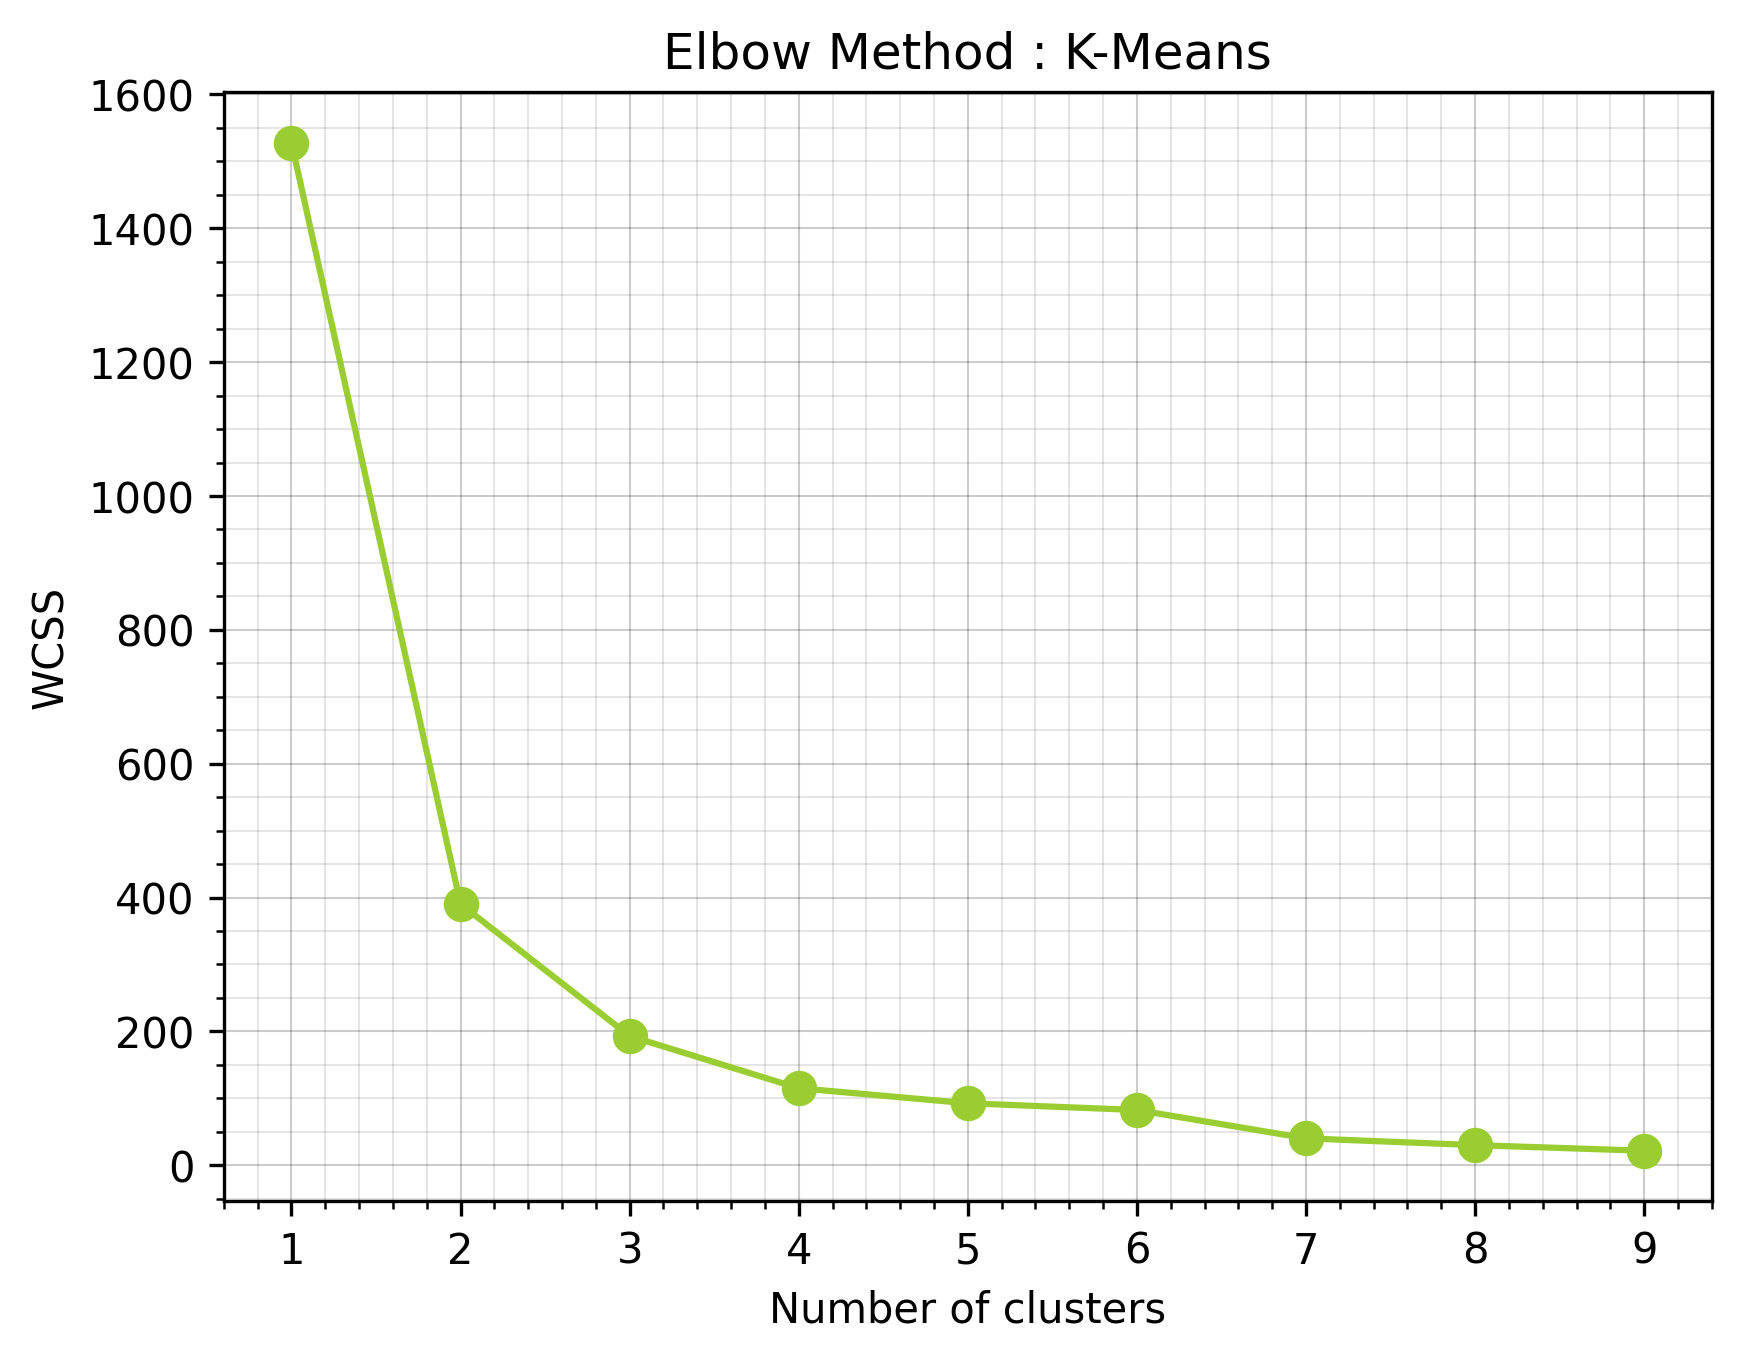

In [189]:
# Verify the optimum number of clusters using the Elbow method.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of clusters to be tested.
n_clusters = range(1, 10)
wcss = []
for i in n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto', random_state=0)
    kmeans.fit(X_kmean)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph.
fig = plt.figure(figsize=(6.4, 4.8), dpi=300)
plt.plot(n_clusters, wcss, 'o-', color = "YellowGreen", markersize=7.5)
plt.title('Elbow Method : K-Means', fontsize=12)
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('WCSS', fontsize=10)
plt.minorticks_on() 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=0.20)
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='black', alpha=0.10)
plt.savefig("Elbow_Method_KMeans.png", bbox_inches='tight')

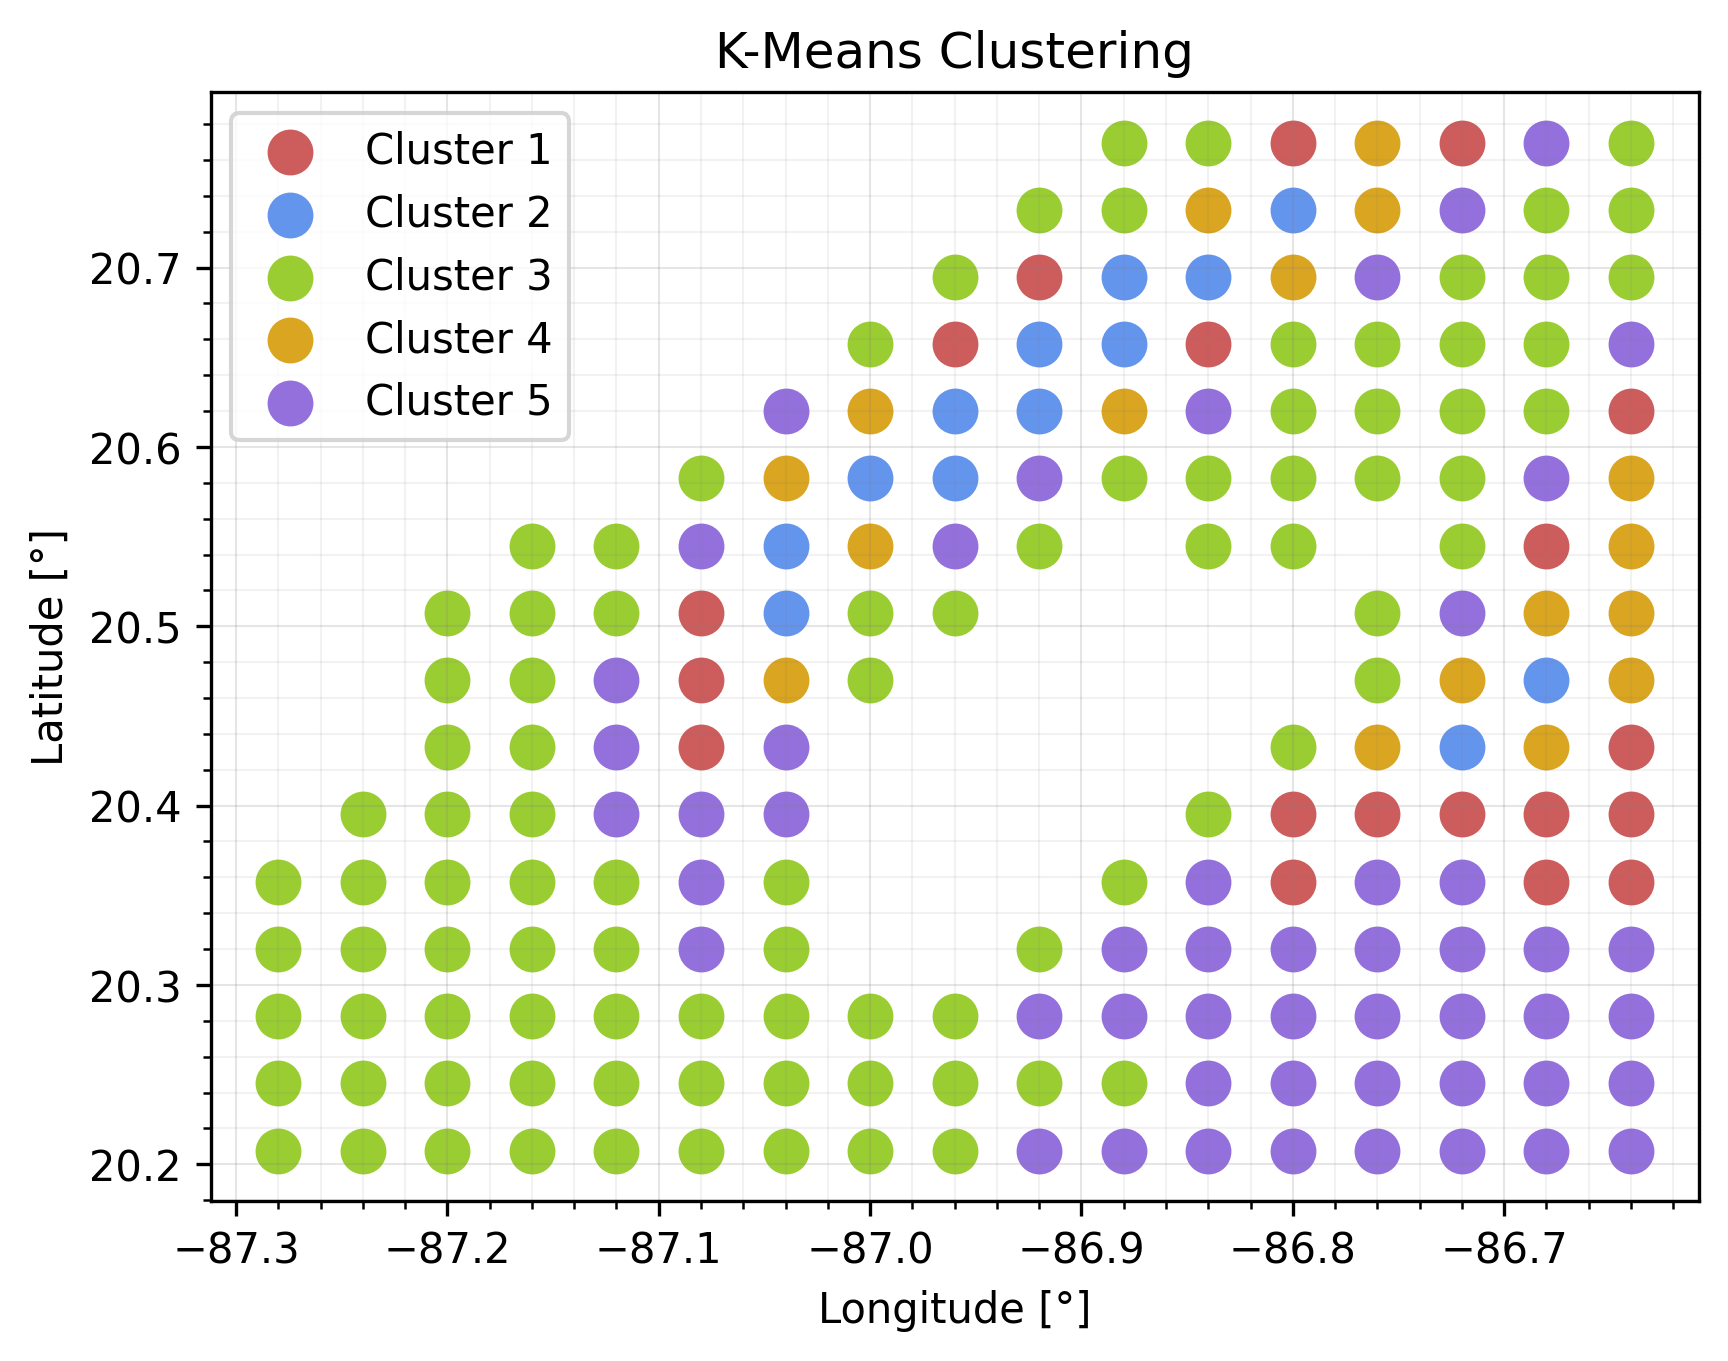

In [190]:
# Compute the K-Means clustering with the optimum number of clusters.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=1000, n_init='auto', random_state=0)
y_kmeans = kmeans.fit_predict(X_kmean)
time_series_features["K-Means_Cluster"] = y_kmeans

# Plott the clusters in the feature space.
fig = plt.figure(figsize=(6.4, 4.8), dpi=300)
plt.scatter(time_series_features["Longitude"][time_series_features["K-Means_Cluster"] == 0], time_series_features["Latitude"][time_series_features["K-Means_Cluster"] == 0], s=100, c='IndianRed', label='Cluster 1')
plt.scatter(time_series_features["Longitude"][time_series_features["K-Means_Cluster"] == 1], time_series_features["Latitude"][time_series_features["K-Means_Cluster"] == 1], s=100, c='CornFlowerBlue', label='Cluster 2')
plt.scatter(time_series_features["Longitude"][time_series_features["K-Means_Cluster"] == 2], time_series_features["Latitude"][time_series_features["K-Means_Cluster"] == 2], s=100, c='YellowGreen', label='Cluster 3')
plt.scatter(time_series_features["Longitude"][time_series_features["K-Means_Cluster"] == 3], time_series_features["Latitude"][time_series_features["K-Means_Cluster"] == 3], s=100, c='GoldenRod', label='Cluster 4')
plt.scatter(time_series_features["Longitude"][time_series_features["K-Means_Cluster"] == 4], time_series_features["Latitude"][time_series_features["K-Means_Cluster"] == 4], s=100, c='MediumPurple', label='Cluster 5')
plt.title('K-Means Clustering', fontsize=12)
plt.xlabel('Longitude [°]', fontsize=10)
plt.ylabel('Latitude [°]', fontsize=10)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey', alpha=0.20)
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='grey', alpha=0.10)
plt.legend()
plt.savefig("KMeans_Clustering.png", bbox_inches='tight')

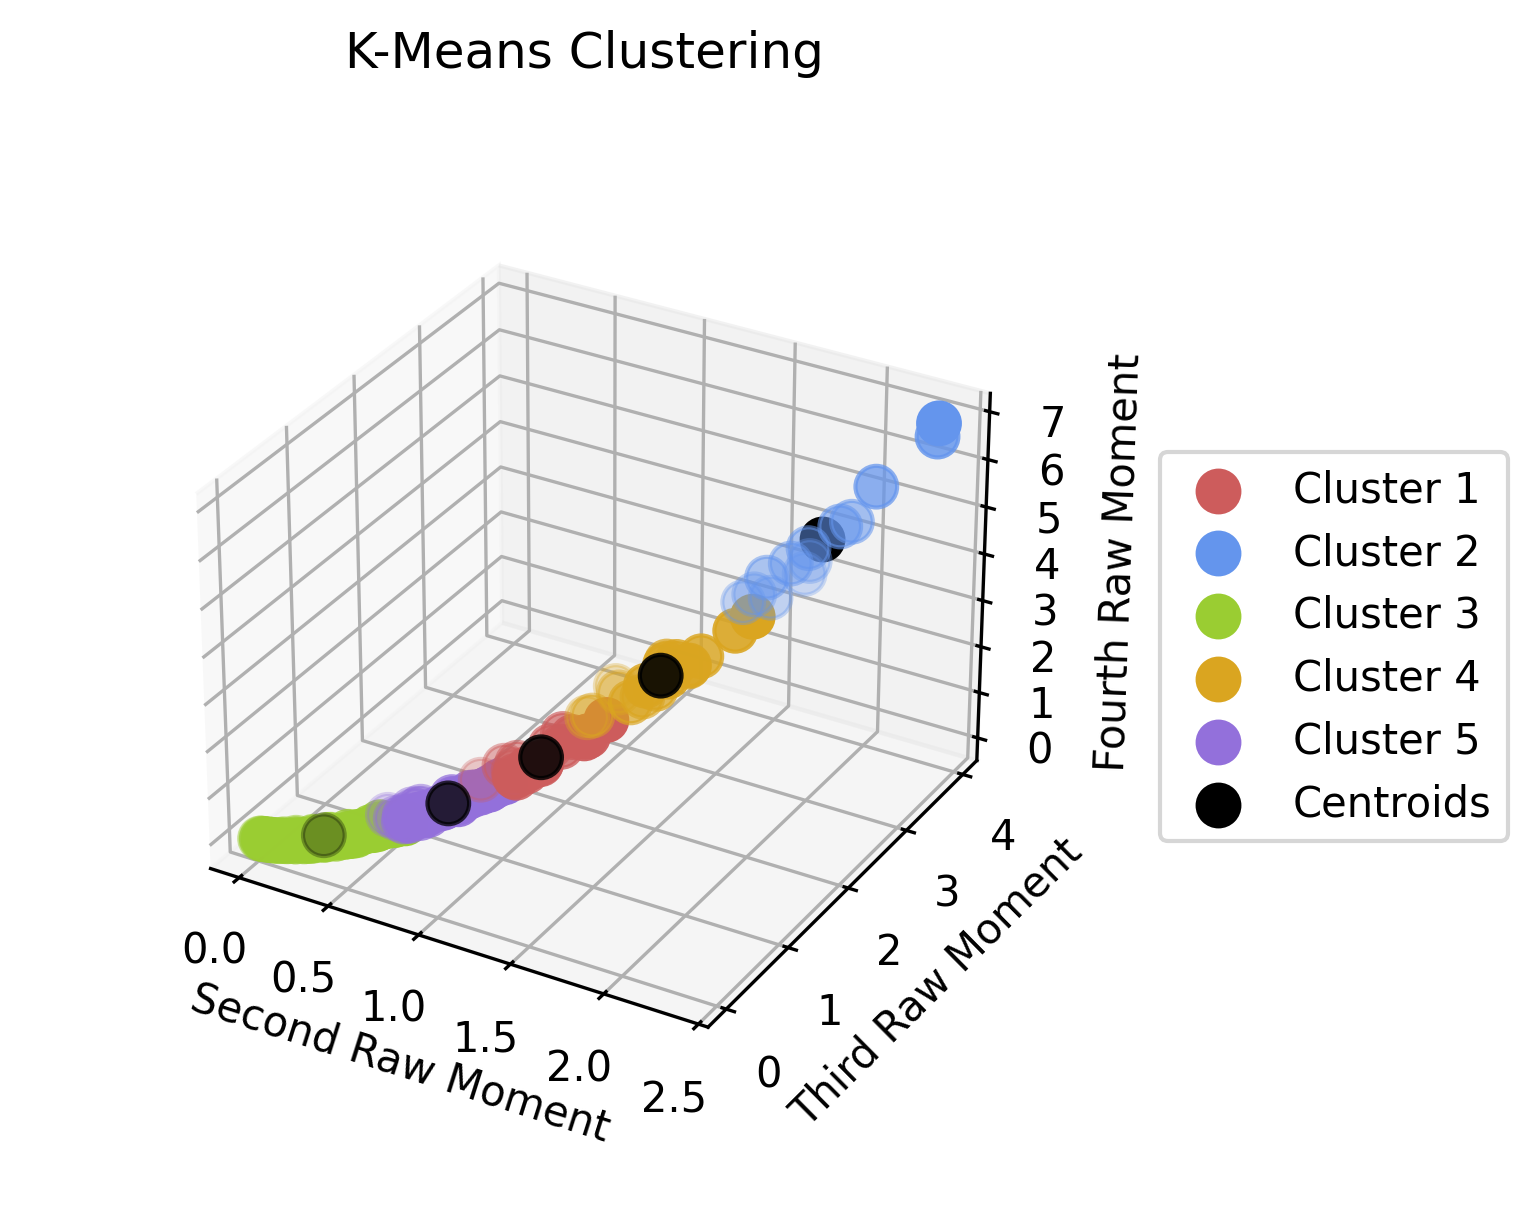

In [191]:
# Plotting the centroids of the clusters in a 3D space.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6.4, 4.8), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_kmean[y_kmeans == 0, 0], X_kmean[y_kmeans == 0, 1], X_kmean[y_kmeans == 0, 2], s=100, c='IndianRed', label='Cluster 1')
ax.scatter(X_kmean[y_kmeans == 1, 0], X_kmean[y_kmeans == 1, 1], X_kmean[y_kmeans == 1, 2], s=100, c='CornFlowerBlue', label='Cluster 2')
ax.scatter(X_kmean[y_kmeans == 2, 0], X_kmean[y_kmeans == 2, 1], X_kmean[y_kmeans == 2, 2], s=100, c='YellowGreen', label='Cluster 3')
ax.scatter(X_kmean[y_kmeans == 3, 0], X_kmean[y_kmeans == 3, 1], X_kmean[y_kmeans == 3, 2], s=100, c='GoldenRod', label='Cluster 4')
ax.scatter(X_kmean[y_kmeans == 4, 0], X_kmean[y_kmeans == 4, 1], X_kmean[y_kmeans == 4, 2], s=100, c='MediumPurple', label='Cluster 5')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='black', label='Centroids')
ax.set_title('K-Means Clustering', fontsize=12)
ax.set_xlabel('Second Raw Moment', fontsize=10)
ax.set_ylabel('Third Raw Moment', fontsize=10)
ax.set_zlabel('Fourth Raw Moment', fontsize=10)
ax.set_box_aspect(None, zoom=0.8)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("KMeans_Clustering_3D.png", bbox_inches='tight')

The average silhouette score is:  0.5797405292994808


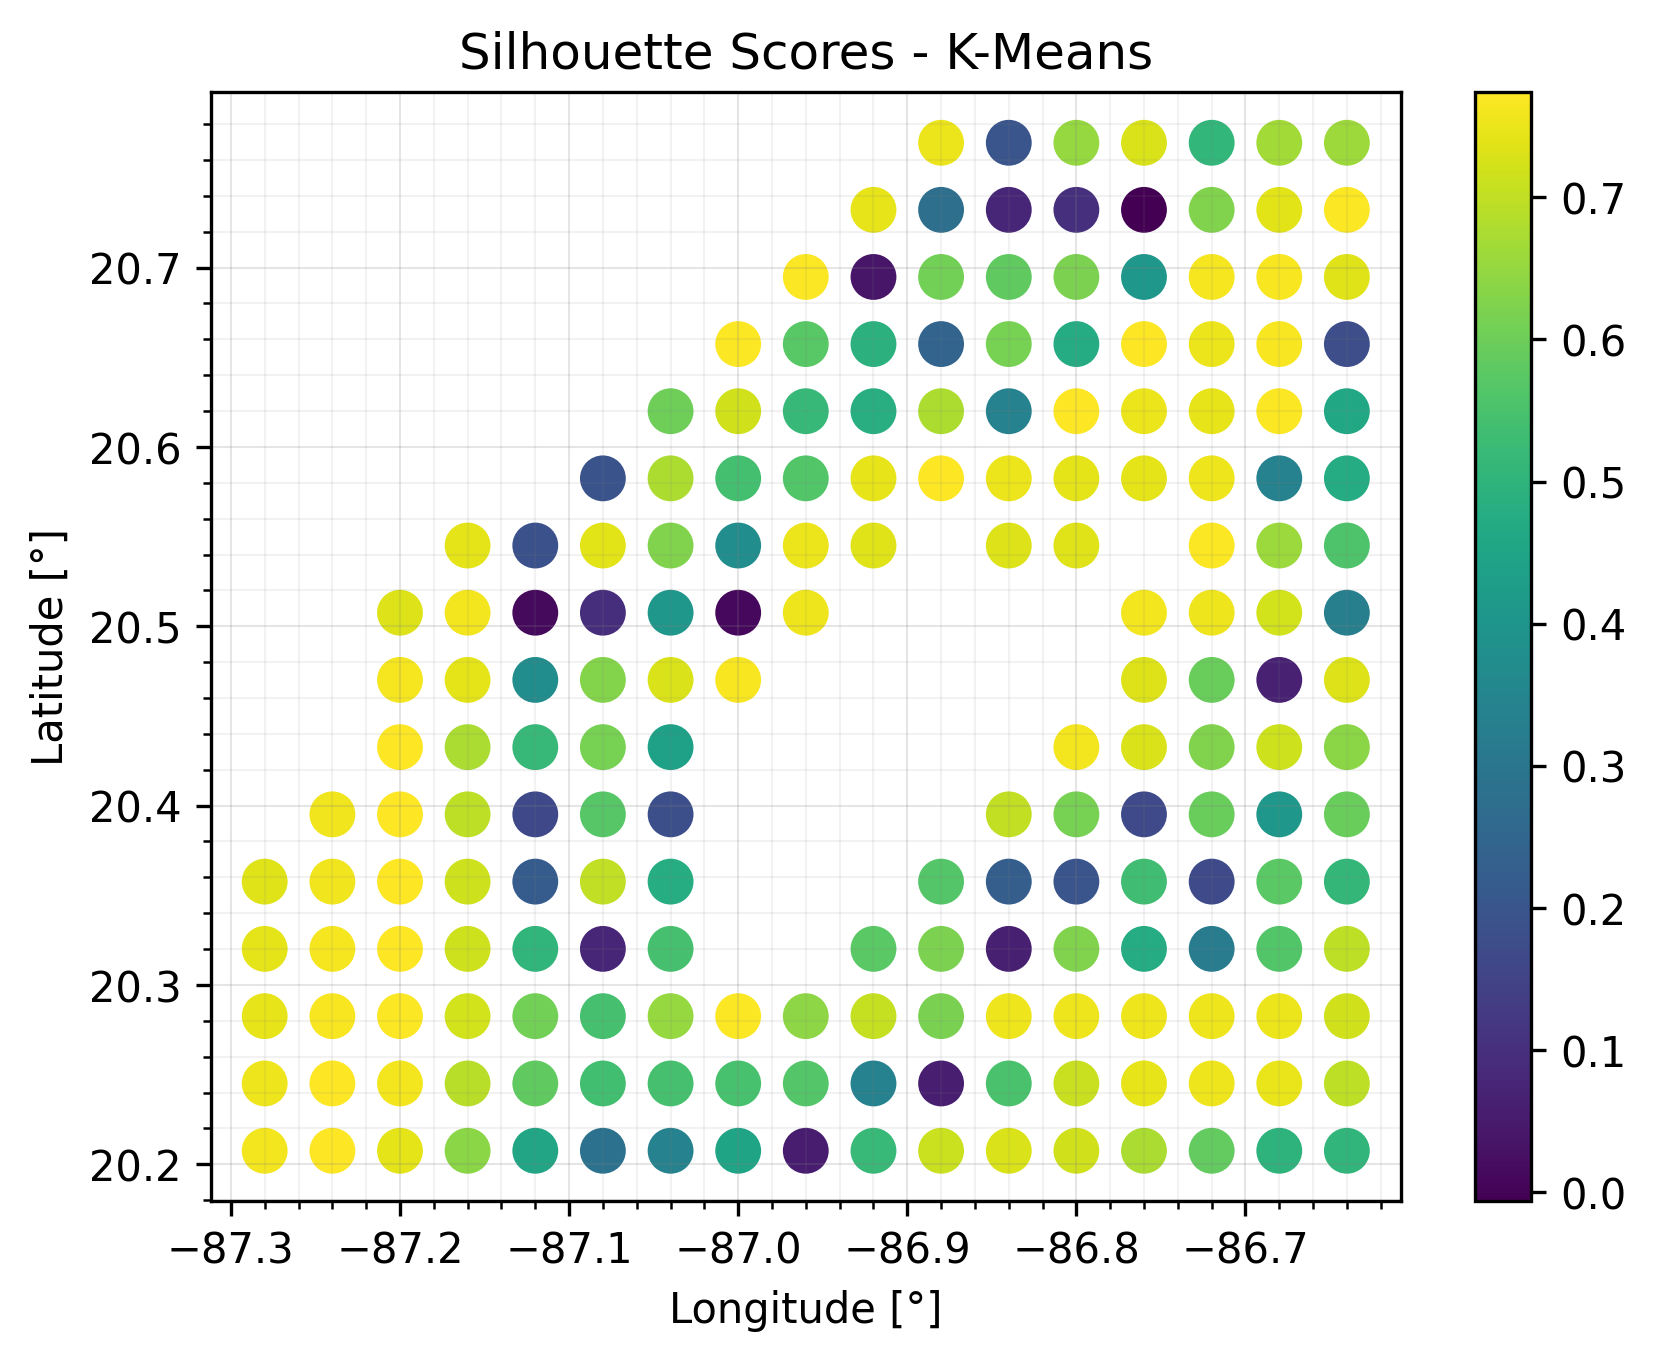

In [192]:
# Potting metrics about the clusters.
from sklearn.metrics import silhouette_score, silhouette_samples
silhoutte_values = silhouette_samples(X_kmean, y_kmeans)
silhoutte_avg = silhouette_score(X_kmean, y_kmeans)
print("The average silhouette score is: ", silhoutte_avg)

plt.figure(figsize=(6.4, 4.8), dpi=300)
plt.scatter(time_series_features["Longitude"], time_series_features["Latitude"], c=silhoutte_values, s=100, cmap='viridis')
plt.title('Silhouette Scores - K-Means', fontsize=12)
plt.xlabel('Longitude [°]', fontsize=10)
plt.ylabel('Latitude [°]', fontsize=10)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey', alpha=0.20)
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='grey', alpha=0.10)
plt.colorbar()
plt.savefig("Silhouette_Scores_KMeans.png", bbox_inches='tight')